In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

sns.set_palette("colorblind")
palette = sns.color_palette()

In [2]:
DATASET_FPATH = 'owid-covid-data.csv'

# Часть I: О теореме Байеса

------
### *1.*
*Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.*

--------

Теорему Байеса для высказывания "*Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен*" можно записать так:

$$p(+|\overline{k}) = \cfrac{p(\overline{k}|+) \cdot p(+)}{p(\overline{k})},$$
где:
* $p(\overline{k})$ -- априорная вероятность, что случайный человек из города не убийца,
* $p(+)$ -- априорная вероятность совпадения группы крови у случайного человека из города,
* $p(+|\overline{k})$ -- вероятность совпадения группы крови, при условии, что человек -- не убийца, 
* $p(\overline{k}|+)$ -- вероятность, что человек -- не убийца, при условии совпадения его группы крови.

Пусть в городе $n$ -- жителей, из которых у $m$ -- группа крови совпадает c группой крови убийцы. Тогда:
    $$p(\overline{k}) = \cfrac{n - 1}{n},\space 
    p(+) = \cfrac{m}{n} = 0.01,\space
    p(\overline{k}|+) = \cfrac{m - 1}{m}. \space$$
Подставим в формулу и получим:
    $$p(+|\overline{k}) = \cfrac{m - 1}{n - 1}$$
 
Для больших $n$ и $m$: 
    $$p(+|\overline{k}) = \cfrac{m - 1}{n - 1} \approx \cfrac{m}{n} = 0.01$$
Тоесть прокурор оказался прав в оценке вероятности $p(+|\overline{k})$ (хотя, возможно, он просто оценил вероятность $p(+)$), однако вероятность $p(k|+),$ к которой он переходит в выводе "*значит, с вероятностью 99% он виновен, предлагаю осудить*" -- не соответствует противоположному событию, и сумма этих вероятностей не равна 1. Ее следует оценить отдельно, снова воспользовавшись теоремой Байеса (что и сделаем в п. 2)

-----
### *2.* 
*Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?*

------

Запишем теорему Байеса для вероятности что человек -- убийца, при условии, что его группа крови совпала:

$$p(k|+) = \cfrac{p(+|k) \cdot p(k)}{p(+)},$$
где:
* $p(k)$ -- априорная вероятность, что случайный человек из города -- убийца,
* $p(+)$ -- априорная вероятность совпадения группы крови у случайного человека из города,
* $p(+|k)$ -- вероятность совпадения группы крови, при условии, что человек -- убийца, 
* $p(k|+)$ -- вероятность, что человек -- убийца, при условии совпадения его группы крови.

Пусть в городе $n$ -- жителей, из которых у $m$ -- группа крови совпадает c группой крови убийцы. Тогда:

$$p(k) = \cfrac{1}{n},\space 
p(+) = \cfrac{m}{n} = 0.01,\space
p(+|k) = 1. \space$$ 
    
Подставим в формулу и получим:

$$p(k|+) = \cfrac{1}{m} = 0.0001$$
    
Таким образом, адвокат верно оценил вероятность, при условии, что все жители города изначально с равной вероятностью могли совершить убийство (очевидно, что в реальной жизни это не так).

-----
### *3.*
*Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?*

-----

Запишем теорему Байеса для апостериорной вероятности болезни после положительного и отрицательного теста:
$$p(i|+) = \cfrac{p(+|i) \cdot p(i)}{p(+|i) \cdot p(i) + p(+|\overline{i}) \cdot p(\overline{i})},$$

$$p(i|-) = \cfrac{p(-|i) \cdot p(i)}{p(-|i) \cdot p(i) + p(-|\overline{i}) \cdot p(\overline{i})}, $$

$$p(+|i) + p(-|i) = 1, $$

$$p(+|\overline{i}) + p(-|\overline{i}) = 1$$

Введем обозначения $fn = p(-|i), \space fp = p(+|\overline{i}) \space$ и подставим значения априорных вероятностей $p(i) = 0.01, \space p(\overline{i}) = 0.99$:

$$p(i|+) = \cfrac{(1 - fn) \cdot 0.01}{(1 - fn) \cdot 0.01 + fp \cdot 0.99},$$ 

$$p(i|-) = \cfrac{fn \cdot 0.01}{fn \cdot 0.01 + (1 - fp) \cdot 0.99}. $$ 

In [3]:
# Функции веорятностей

x = np.linspace(0, 1, 100)
p_1 = lambda fn, fp: 0.01 * (1 - fn) / (0.01 * (1 - fn) + 0.99 * fp) # 𝑝(б|+)
p_2 = lambda fn, fp: 0.01 * fn / (0.01 * fn + 0.99 * (1 - fp)) # 𝑝(б|−)

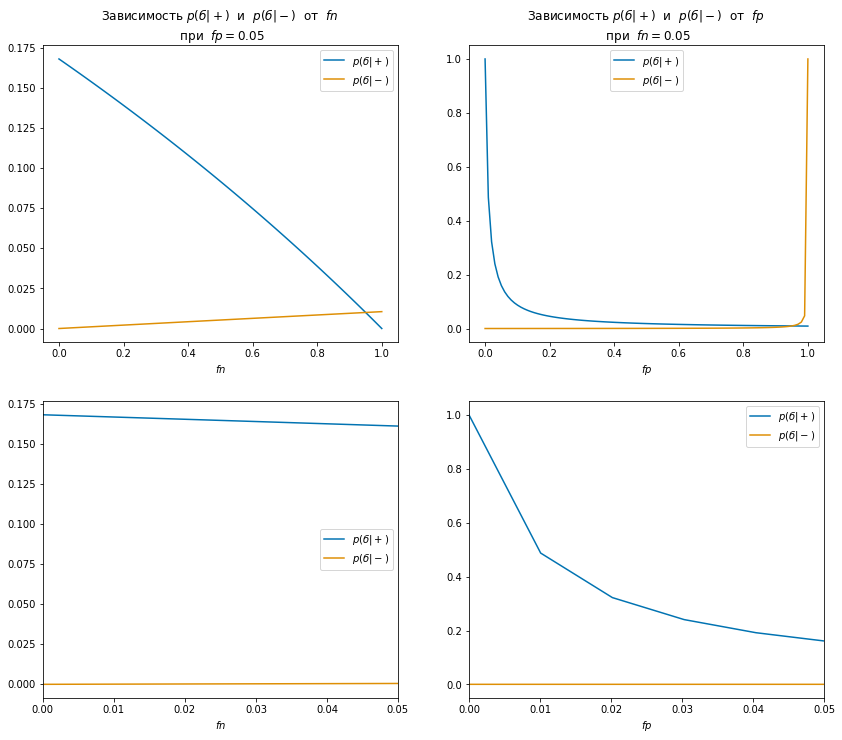

In [4]:
# Графики

fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(14, 12))

ax_1.set_title('Зависимость $p(б|+)$  и  $p(б|-)$  от  $fn$ \n при  $fp = 0.05$')
ax_1.plot(x, p_1(x, np.ones(x.shape) * 0.05), label='$p(б|+)$')
ax_1.plot(x, p_2(x, np.ones(x.shape) * 0.05), label='$p(б|-)$')
ax_1.set_xlabel('$fn$')
ax_1.legend()

ax_2.set_title('Зависимость $p(б|+)$  и  $p(б|-)$  от  $fp$ \n при  $fn = 0.05$')
ax_2.plot(x, p_1(np.ones(x.shape) * 0.05, x), label='$p(б|+)$')
ax_2.plot(x, p_2(np.ones(x.shape) * 0.05, x), label='$p(б|-)$')
ax_2.set_xlabel('$fp$')
ax_2.legend()

ax_3.plot(x, p_1(x, np.ones(x.shape) * 0.05), label='$p(б|+)$')
ax_3.plot(x, p_2(x, np.ones(x.shape) * 0.05), label='$p(б|-)$')
ax_3.set_xlabel('$fn$')
ax_3.set_xlim((0, 0.05))
ax_3.legend()

ax_4.plot(x, p_1(np.ones(x.shape) * 0.05, x), label='$p(б|+)$')
ax_4.plot(x, p_2(np.ones(x.shape) * 0.05, x), label='$p(б|-)$')
ax_4.set_xlim((0, 0.05))
ax_4.set_xlabel('$fp$')
ax_4.legend()

plt.show()

Медикам стоит уменьшать ошибку false positive, так как это приведет к существенному увеличению апостериорной вероятности что человек действительно болен при положительном тесте.  

# Часть II: О линейной регрессии

### *1.*

In [5]:
# Подготовка данных

df = pd.read_csv(DATASET_FPATH, parse_dates=['date']) # загружаем датасет
df = df[(df.location == 'Russia') & (df.date >= '2020-03-03')] # оставляем данные только по России начиная от 3 марта 2020
df.reset_index(inplace=True, drop=True)
df_sorted = df.sort_values(by='date')

df_sorted.loc[df['new_cases'] == 0, 'new_cases'] = 1

df_train = df_sorted[:50]
df_train.head()

target_columns_name = ['new_cases', 'total_cases']
Y_train = df_train[target_columns_name]

### *2.*

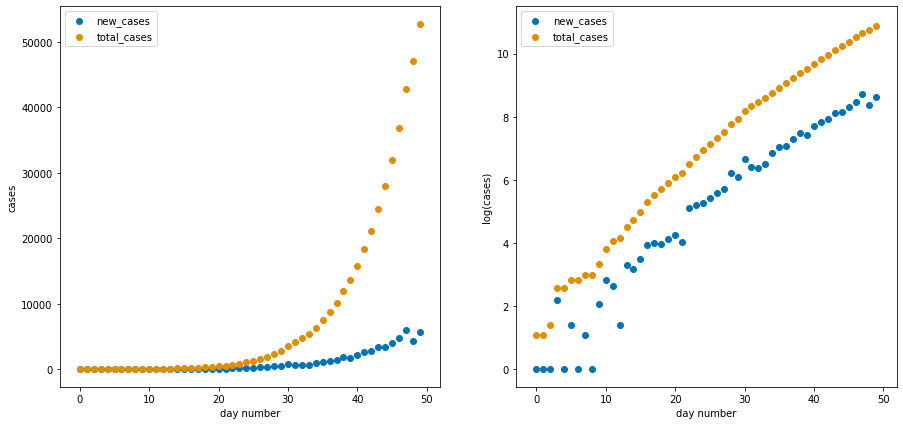

In [6]:
# Графики зависимости целевых переменных от количества дней прошедщих с 3 марта 2020

fix, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 7))

ax_1.scatter(df_train.index, df_train.new_cases, label='new_cases')
ax_1.scatter(df_train.index, df_train.total_cases, label='total_cases')
ax_1.set_ylabel('cases')
ax_1.set_xlabel('day number')
ax_1.legend()

ax_2.scatter(df_train.index, np.log(df_train.new_cases), label='new_cases')
ax_2.scatter(df_train.index, np.log(df_train.total_cases), label='total_cases')
ax_2.set_ylabel('log(cases)')
ax_2.set_xlabel('day number')
ax_2.legend()

plt.show()

### *2a.*

In [7]:
# выбираем априорное распределение весов - нормальное, с нулевым вектором средних mu_0
# и с одинаковой дисперсией, которую задаем косвенно через alpha

alpha=0.5
mu_0 = np.array([0, 0])

x_train = df_train.index._data.reshape(-1, 1)

lr = Ridge(alpha=alpha)

lr.fit(x_train, np.log(Y_train.total_cases))

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### *2b.*

In [8]:
# Дисперсия шума данных и весов

data_variance = np.mean((lr.predict(x_train) - np.log(Y_train.total_cases)) ** 2) # Дисперсия шума данных
weight_variance = data_variance / alpha # Дисперсия весов

print(f'data variance = {data_variance}')
print(f'weights variance = {weight_variance}')

data variance = 0.12183048042290871
weights variance = 0.24366096084581743


In [9]:
# Апостериорное распределение

Ones = np.ones((x_train.shape[0], 1))
X_train_extended = np.hstack((x_train, Ones))

sigma_0_inverted = np.matrix(np.eye(X_train_extended.T.shape[0]) * weight_variance).I

sigma_n = np.matrix(sigma_0_inverted + X_train_extended.T @ X_train_extended / data_variance).I

mu_n = np.array(sigma_n @ (sigma_0_inverted @ mu_0 + X_train_extended.T @ np.log(Y_train.total_cases) / data_variance).T).flatten()

post_dist = st.multivariate_normal(mu_n, sigma_n)

### *2c.*

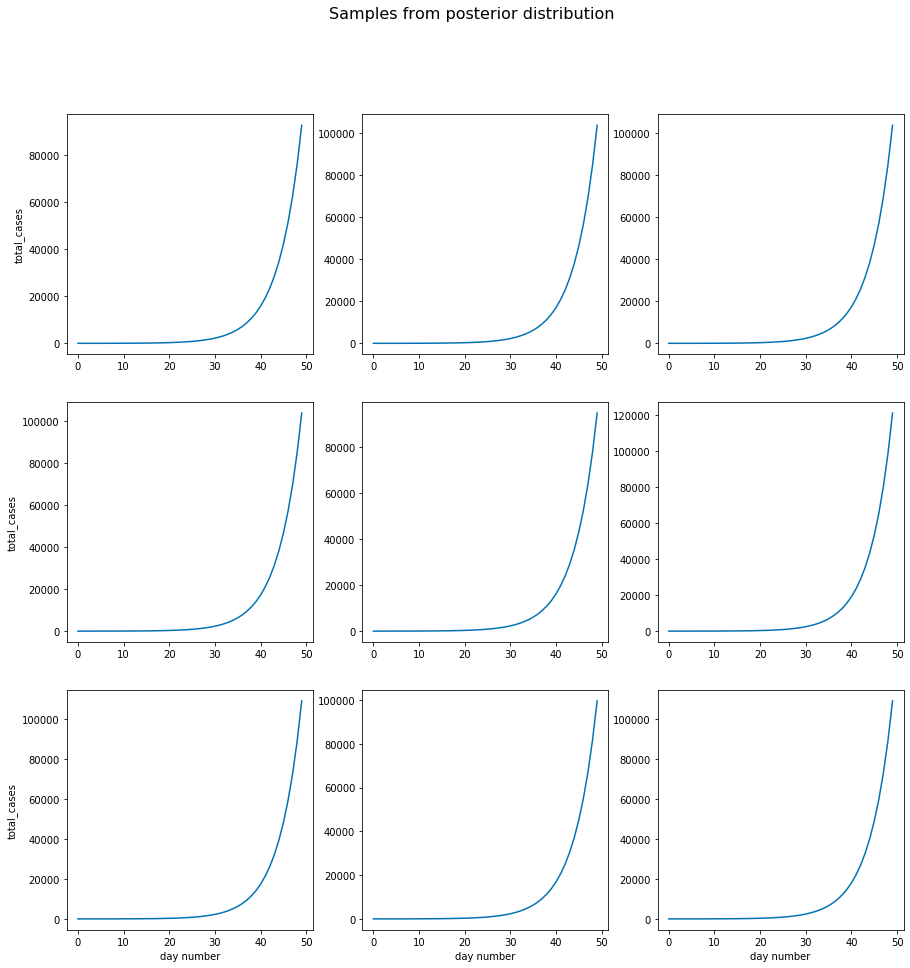

In [10]:
# Графики сэмплов

n_days = 50

Ones = np.ones((df_sorted.index._data.reshape(-1, 1).shape[0], 1))
X_extended = np.hstack((df_sorted.index._data.reshape(-1, 1), Ones))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for ax in axes.flatten():
    weights = post_dist.rvs()
    ax.plot([x for x in range(X_extended[:n_days].shape[0])], np.exp([weights.T @ x for x in X_extended[:n_days]]))

for i in range(3):    
    axes[i][0].set_ylabel('total_cases')
    axes[2][i].set_xlabel('day number')
    
fig.suptitle('Samples from posterior distribution', fontsize=16)
    
plt.show()

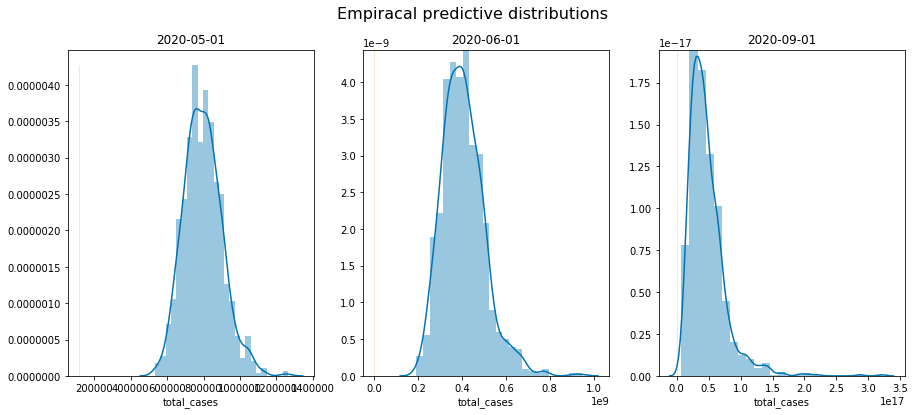

In [11]:
# Предсказательные распределения для 2020-05-01, 2020-06-01 и 2020-09-01

may_1_2020 = []
jun_1_2020 = []
sep_1_2020 = []

for i in range(1000):
    weights = post_dist.rvs()
    may_1_2020.append(np.exp(weights.T @  [df[df.date == '2020-05-01'].index[0], 1.]))
    jun_1_2020.append(np.exp(weights.T @  [df[df.date == '2020-06-01'].index[0], 1.]))
    sep_1_2020.append(np.exp(weights.T @  [df[df.date == '2020-09-01'].index[0], 1.]))
    
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(f'Empiracal predictive distributions', fontsize=16)

for ax, x, t in zip(axes, (may_1_2020, jun_1_2020, sep_1_2020), ('2020-05-01', '2020-06-01', '2020-09-01')):
    y_lim = sns.distplot(x, bins=25, norm_hist=True, ax=ax).dataLim._points[1, 1]
    sns.lineplot(df[df.date == f'{t}'].total_cases.values[0] * np.ones(2), np.linspace(0, y_lim, 2), ax=ax)
    ax.set_xlabel('total_cases')
    ax.set_title(f'{t}')

In [12]:
# Наблюдения для формирования эмпирического предсказательного распределения

res = []

for i in range(1000):
    weights = post_dist.rvs()
    res.append(np.exp([weights.T @ x for x in X_extended]))
        
res = np.array(res)
means = np.mean(res, axis=0)
stds = np.std(res, axis=0)

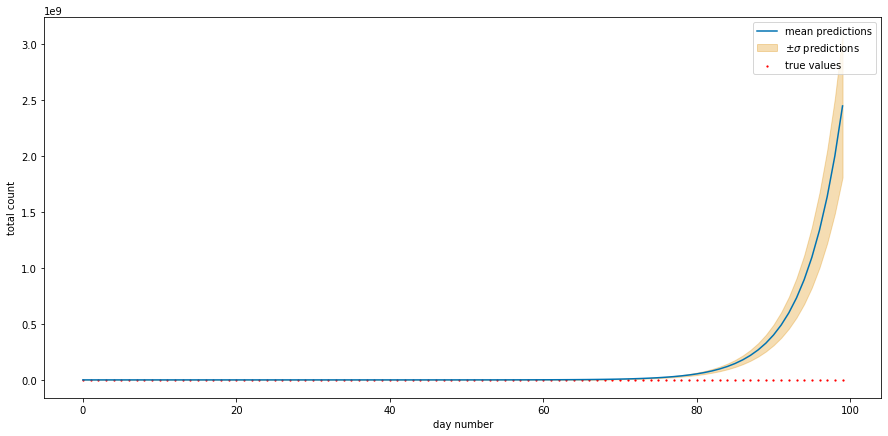

In [13]:
# Графики предсказательного распределения

n_days = 100

fig = plt.figure(figsize=(15, 7))

plt.plot(df_sorted[:n_days].index, means[:n_days], label='mean predictions')
plt.fill_between(
    df_sorted[:n_days].index, means[:n_days] - stds[:n_days], 
    means[:n_days] + stds[:n_days], 
    color=palette[1], 
    alpha =.3, 
    label='$\pm \sigma$ predictions'
)
plt.scatter(df_sorted[:n_days].index, df_sorted[:n_days].total_cases, color='r', s=1.5, label='true values')
plt.xlabel('day number')
plt.ylabel('total count')
plt.legend()
plt.show()

### *3a.*

$$  y \propto \Phi_{\mu, \sigma} (x), $$

$$  y = C \cdot \int\limits_{-\infty}^x e^{-\frac{(t-\mu)^2}{2\sigma^2}} dx,$$

$$  y^{'} = e^{-\frac{(x-\mu)^2}{2\sigma^2} + C}, $$

$$  \ln{y^{'}} = \frac{1}{2\sigma^2}x^{2} + \frac{\mu}{\sigma^2}x - \frac{\mu^{2}}{2\sigma^2} + C, $$

Таким образом, обучаем регрессию на данных:  $$ \mathbf{X} = (\mathbf{x^2}, \mathbf{x}, \mathbf{1}),\space \ln{\mathbf{y^{'}}}.$$

Координаты векотора $\mathbf{y^{'}}$ - соответствуют значениям столбца *new_cases*.

### *3b.*

In [14]:
# Линейная модель с l2 регуляризацией (нормальное распределение весов)

alpha=0.5
mu_0 = np.array([0, 0, 0])

X_train = np.hstack((df_train.index._data.reshape(-1, 1) ** 2, df_train.index._data.reshape(-1, 1)))

lr = Ridge(alpha=alpha)
lr.fit(X_train, np.log(Y_train.new_cases))

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
# Дисперсия данных и весов

data_variance = np.mean(
    (lr.predict(X_train) - np.log(Y_train.new_cases)) ** 2
)

weight_variance = data_variance / alpha

print(f'data variance = {data_variance}')
print(f'weights variance = {weight_variance}')

data variance = 0.2392874034199144
weights variance = 0.4785748068398288


In [16]:
# Постериорное распределение

Ones = np.ones((X_train.shape[0], 1))
X_train_extended = np.hstack((X_train, Ones))

sigma_0_inverted = np.matrix(np.eye(X_train_extended.T.shape[0]) * weight_variance).I

sigma_n = np.matrix(sigma_0_inverted + X_train_extended.T @ X_train_extended / data_variance).I

mu_n = np.array(sigma_n @ (sigma_0_inverted @ mu_0 + X_train_extended.T @ np.log(Y_train.new_cases) / data_variance).T).flatten()

post_dist = st.multivariate_normal(mu_n, sigma_n)

### *3c.*

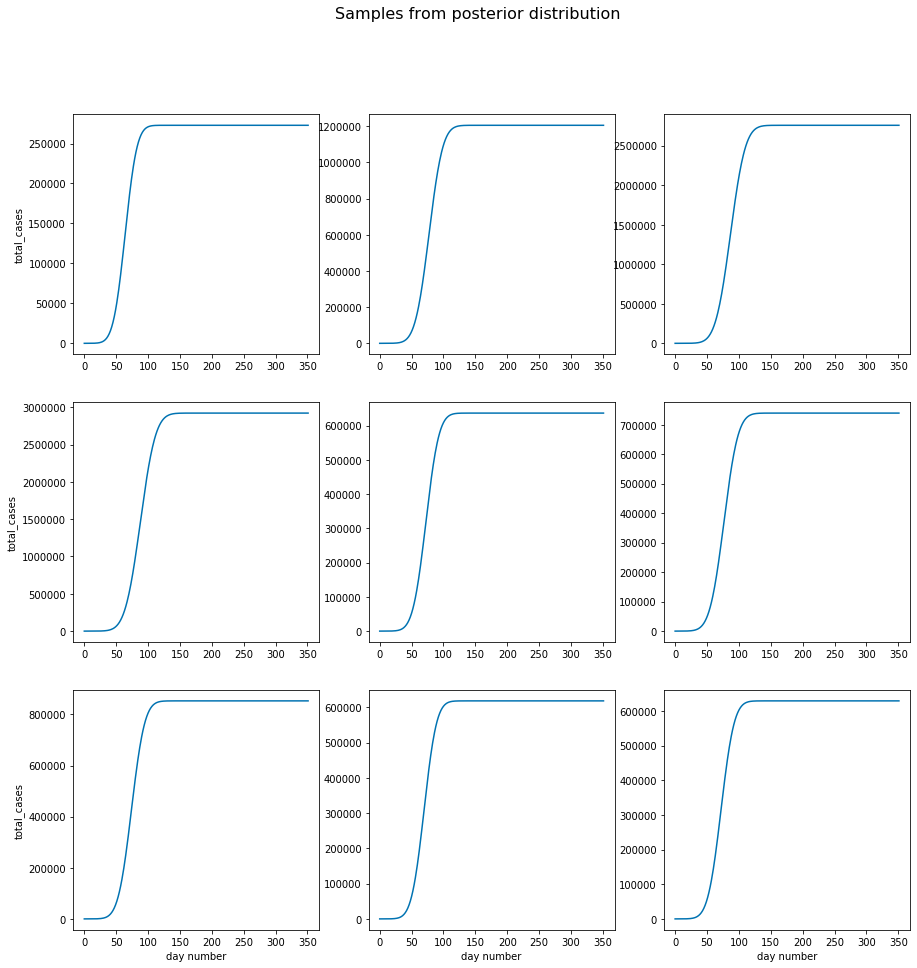

In [17]:
# Cэмплы сигмоид

X = np.hstack((df_sorted.index._data.reshape(-1, 1) ** 2, df_sorted.index._data.reshape(-1, 1)))
Ones = np.ones((df_sorted.index._data.reshape(-1, 1).shape[0], 1))
X_extended = np.hstack((X, Ones))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for ax in axes.flatten():
    weights = post_dist.rvs()
    sns.lineplot([x for x in range(X_extended.shape[0])], np.cumsum(np.exp([weights.T @ x for x in  X_extended])), ax=ax)

for i in range(3):    
    axes[i][0].set_ylabel('total_cases')
    axes[2][i].set_xlabel('day number')
    
fig.suptitle('Samples from posterior distribution', fontsize=16)
    
plt.show()

In [18]:
# Наблюдения для формирования эмпирического предсказательного распределения

res = []

for i in range(1000):
    weights = post_dist.rvs()
    res.append(np.cumsum(np.exp([weights.T @ x for x in  X_extended])))
        
res = np.array(res)

medians = np.median(res, axis=0)
means = np.mean(res, axis=0)
q_10 = np.quantile(res, 0.1, axis=0)
q_90 = np.quantile(res, 0.9, axis=0)

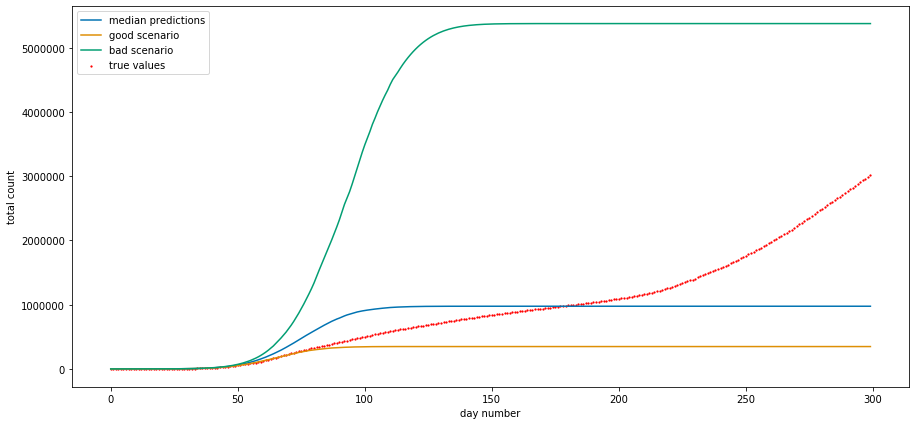

good scenario total cases: 347696
bad scenario total cases: 5374653


In [19]:
# Строим графики предсказательного распределения

n_days = 300

fig = plt.figure(figsize=(15, 7))

plt.plot(df_sorted[:n_days].index, medians[:n_days], label='median predictions')
# plt.plot(df_sorted[:n_days].index, means[:n_days], label='mean predictions')
plt.plot(df_sorted[:n_days].index, q_10[:n_days], label='good scenario')
plt.plot(df_sorted[:n_days].index, q_90[:n_days], label='bad scenario')

plt.scatter(df_sorted[:n_days].index, df_sorted[:n_days].total_cases, color='r', s=1.5, label='true values')
plt.xlabel('day number')
plt.ylabel('total count')
plt.legend()
plt.show()

print(f'good scenario total cases: {int(q_10[200])}')
print(f'bad scenario total cases: {int(q_90[200])}')